In [1]:
from nmf import *
import timeit
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Test dataset generation
#fac = 10
#d = 5

#np.random.seed(42)
#M = np.random.rand(5 * fac, 10 * fac)
#w_0 = np.random.rand(5 * fac, d)
#h_0 = np.random.rand(d, 10 * fac)

## Test dataset loading and matrix initialization

In [3]:
df = pd.read_csv('converted.csv')

M = df.to_numpy().astype('float32')
M /= 5

d = 100
m, n = M.shape
w_0 = np.random.rand(m, d)
h_0 = np.random.rand(d, n)

df.describe()

,3704,1924,4837,867,2631,5410,1733,3536,780,3312,...,207,5817,4097,4755,3977,1520,4622,2160,2542,1535
count,3676.000000,3676.000000,3676.000000,3676.000000,3676.000000,3676.000000,3676.000000,3676.000000,3676.000000,3676.000000,...,3676.000000,3676.000000,3676.000000,3676.000000,3676.000000,3676.000000,3676.000000,3676.000000,3676.000000,3676.000000
mean,0.193689,0.057127,0.223341,0.034276,0.080250,0.034276,0.589227,0.119423,0.378945,0.405060,...,0.013602,0.022035,0.019042,0.028564,0.023395,0.021491,0.017410,0.013602,0.018770,0.019314
std,0.922300,0.449944,0.871879,0.369475,0.596891,0.355207,1.376749,0.677846,1.126928,1.112436,...,0.222123,0.310021,0.272388,0.369593,0.308601,0.303854,0.254957,0.247612,0.274893,0.294913
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Setup parameters for the algorithm
- steps: iterations of the outer loop
- delta: minimum value in W, H --> 0 for base NMF
- error: error function for logging (can be replaced by any function accepting 2 matrices as input)

In [4]:
# Algorithm parameters
steps = 100
delta = 0
error = rmse_error

Setup variables for algorithm execution
- Create copies of initialized W, H for repetetive tests with the same starting points
- Create logging dictionaries that will log time and error

In [5]:
# Variable setup
Ws, Hs = [], []
for i in range(4):
    Ws.append(np.copy(w_0))
    Hs.append(np.copy(h_0))

log_1 = {}
log_2 = {}
log_3 = {}
log_4 = {}

_, _, c_1 = NMF(M, Ws[0], Hs[0], mu_w, mu_h, delta, steps, error, log_1)
_, _, c_2 = NMF_A(M, Ws[1], Hs[1], mu_w, mu_h, delta, steps, error, alpha=1, epsilon=0.1, log=log_2)
_, _, c_3 = NMF(M, Ws[2], Hs[2], hals_w, hals_h, delta, steps, error, log_3)
_, _, c_4 = NMF_A(M, Ws[3], Hs[3], hals_w, hals_h, delta, steps, error, alpha=1, epsilon=0.1, log=log_4)

Repeat same setup for timed execution of the functions
- n: number of executions of each algorithm to be performed

In [6]:
# Variable setup for timing
Ws, Hs = [], []
for i in range(4):
    Ws.append(np.copy(w_0))
    Hs.append(np.copy(h_0))

n = 1

result = [0, 0, 0, 0]
result[0] = timeit.timeit(stmt='NMF(M, Ws[0], Hs[0], mu_w, mu_h, delta, steps, error)', globals=globals(), number=n)
result[1] = timeit.timeit(stmt='NMF_A(M, Ws[1], Hs[1], mu_w, mu_h, delta, steps, error, alpha=2, epsilon=0.1)', globals=globals(), number=n)
result[2] = timeit.timeit(stmt='NMF(M, Ws[2], Hs[2], hals_w, hals_h, delta, steps, error)', globals=globals(), number=n)
result[3] = timeit.timeit(stmt='NMF_A(M, Ws[3], Hs[3], hals_w, hals_h, delta, steps, error, alpha=2, epsilon=0.1)', globals=globals(), number=n)

## Results
Print some of the collected results (mainly for debugging and verification)

In [7]:
# Print Error Development
for i, (l1, l2, l3, l4) in enumerate(zip(log_1, log_2, log_3, log_4)):
    print(f"Step {i:3d}: MU {log_1[l1]:.5f}, AMU {log_2[l2]:.5f}, HALS {log_3[l3]:.5f}, AHALS {log_4[l4]:.5f}")

print()

# Print total updates for W and H
for i in ['w', 'h']:
    print(f"Mat. [{i}]: MU {c_1[i]:4d}, AMU {c_2[i]:4d}, HALS {c_3[i]:4d}, AHALS {c_4[i]:4d}")

print()

# Print execution times in ms
print(f"Times: MU {result[0]/n:.2f}s, AMU {result[1]/n:.2f}s,"
      f" HALS {result[2]/n:.2f}s, AHALS {result[3]/n:.2f}s")

Step   0: MU 1950.97600, AMU 1950.97600, HALS 1950.97600, AHALS 1950.97600
Step   1: MU 9.65836, AMU 9.65257, HALS 38.42653, AHALS 9.67068
Step   2: MU 9.63089, AMU 9.60087, HALS 9.75476, AHALS 9.74831
Step   3: MU 9.62435, AMU 9.47666, HALS 9.62982, AHALS 9.36005
Step   4: MU 9.61648, AMU 9.16013, HALS 9.59282, AHALS 9.19180
Step   5: MU 9.60605, AMU 8.91478, HALS 9.55281, AHALS 9.07692
Step   6: MU 9.59109, AMU 8.75489, HALS 9.43847, AHALS 8.97270
Step   7: MU 9.56830, AMU 8.64536, HALS 9.34129, AHALS 8.89239
Step   8: MU 9.53265, AMU 8.56517, HALS 9.28584, AHALS 8.82455
Step   9: MU 9.47847, AMU 8.50310, HALS 9.25133, AHALS 8.75630
Step  10: MU 9.40452, AMU 8.45330, HALS 9.21794, AHALS 8.69330
Step  11: MU 9.31969, AMU 8.41253, HALS 9.17448, AHALS 8.64357
Step  12: MU 9.23576, AMU 8.37882, HALS 9.11799, AHALS 8.60112
Step  13: MU 9.15803, AMU 8.35092, HALS 9.05655, AHALS 8.56388
Step  14: MU 9.08723, AMU 8.32779, HALS 8.99747, AHALS 8.53048
Step  15: MU 9.02317, AMU 8.30853, HALS 8.

### Graph generation
Plot recorded outputs on a graph that is X and Y limited to the interesting region for visibility

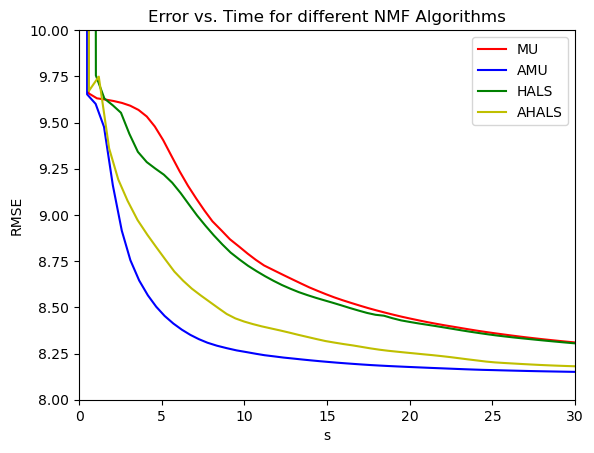

In [13]:
time_0, time_1, time_2, time_3 = [], [], [], []
errs_0, errs_1, errs_2, errs_3 = [], [], [], []

for i, k in enumerate(log_1):
    time_0.append(k)
    errs_0.append(log_1[k])
time_0 = [x - time_0[0] for x in time_0]
    
for i, k in enumerate(log_2):
    time_1.append(k)
    errs_1.append(log_2[k])
time_1 = [x - time_1[0] for x in time_1]

for i, k in enumerate(log_3):
    time_2.append(k)
    errs_2.append(log_3[k])
time_2 = [x - time_2[0] for x in time_2]

for i, k in enumerate(log_4):
    time_3.append(k)
    errs_3.append(log_4[k])
time_3 = [x - time_3[0] for x in time_3]

plt.plot(time_0, errs_0, 'r', label='MU')
plt.plot(time_1, errs_1, 'b', label='AMU')
plt.plot(time_2, errs_2, 'g', label='HALS')
plt.plot(time_3, errs_3, 'y', label='AHALS')
#plt.yscale('log')
#plt.xscale('log')
plt.xlim([0, 30])
plt.ylim([8, 10])
plt.ylabel('RMSE')
plt.xlabel('s')
plt.title('Error vs. Time for different NMF Algorithms')
plt.legend()
plt.show()
